# 💘 Lovely JAX

> After all, you are only human.

::: {.content-visible when-format="markdown"}
## [Read full docs](https://xl0.github.io/lovely-jax) | ❤️ [Lovely Tensors](https://github.com/xl0/lovely-tensors) | 💟 [Lovely `NumPy`](https://github.com/xl0/lovely-numpy) | [Discord](https://discord.gg/4NxRV7NH)
:::

::: {.content-visible when-format="html"}
<h2><a href="https://github.com/xl0/lovely-jax">Source code</a> | ❤️ <a href="https://xl0.github.io/lovely-tensors"> Lovely Tensors</a> | 💟 <a href="https://xl0.github.io/lovely-numpy"> Lovely <tt>NumPy</tt></a> | <a href="https://discord.gg/4NxRV7NH">Discord</a>
</h2>
:::


## Note: I'm pretty new to JAX
If something does not make sense, shoot me an [Issue](https://github.com/xl0/lovely-jax/issues) or ping me on Discord and let me know how it's supposed to work!

Better support for sharded arrays and solid jit/pmap/vmap support coming soon!

## Install

```sh
pip install lovely-jax
```

## How to use

In [ ]:
# |hide
import numpy as np
from PIL import Image
from matplotlib import rcParams, pyplot as plt
import jax, jax.numpy as jnp
from fastcore.test import test_eq

In [ ]:
# |hide
np.set_printoptions(linewidth=120, precision=3)

In [ ]:
# |hide
numbers = jnp.load("mysteryman.npy")
numbers1 = numbers.transpose(1,2,0)

How often do you find yourself debugging JAX code? You dump an array to the cell output, and see this:

In [ ]:
# |hide
import lovely_jax as lj

In [ ]:
# |hide
# A trick to make sure README.md shows the plain version.
lj.monkey_patch()
numbers = numbers.p

In [ ]:
numbers 

Array([[[-0.354, -0.337, -0.405, ..., -0.56 , -0.474,  2.249],
        [-0.405, -0.423, -0.491, ..., -0.919, -0.851,  2.163],
        [-0.474, -0.474, -0.542, ..., -1.039, -1.039,  2.198],
        ...,
        [-0.902, -0.834, -0.936, ..., -1.467, -1.296,  2.232],
        [-0.851, -0.782, -0.936, ..., -1.604, -1.501,  2.18 ],
        [-0.834, -0.816, -0.971, ..., -1.656, -1.553,  2.112]],

       [[-0.197, -0.197, -0.303, ..., -0.478, -0.373,  2.411],
        [-0.25 , -0.232, -0.338, ..., -0.705, -0.67 ,  2.359],
        [-0.303, -0.285, -0.39 , ..., -0.74 , -0.81 ,  2.376],
        ...,
        [-0.425, -0.232, -0.373, ..., -1.09 , -1.02 ,  2.429],
        [-0.39 , -0.232, -0.425, ..., -1.23 , -1.23 ,  2.411],
        [-0.408, -0.285, -0.478, ..., -1.283, -1.283,  2.341]],

       [[-0.672, -0.985, -0.881, ..., -0.968, -0.689,  2.396],
        [-0.724, -1.072, -0.968, ..., -1.247, -1.02 ,  2.326],
        [-0.828, -1.125, -1.02 , ..., -1.264, -1.16 ,  2.379],
        ...,
        [-1.

In [ ]:
# | hide
numbers = numbers1

Was it really useful for you, as a human, to see all these numbers?

What is the shape? The size?\
What are the statistics?\
Are any of the values `nan` or `inf`?\
Is it an image of a man holding a tench?

In [ ]:
import lovely_jax as lj

In [ ]:
lj.monkey_patch()

## Summary

In [ ]:
numbers

Array[196, 196, 3] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073 gpu:0

Better, huh?

In [ ]:
numbers[1,:6,1] # Still shows values if there are not too many.

Array[6] x∈[-0.408, -0.232] μ=-0.340 σ=0.075 gpu:0 [-0.250, -0.232, -0.338, -0.408, -0.408, -0.408]

In [ ]:
spicy = numbers.flatten()[:12].copy()

spicy = (spicy  .at[0].mul(10000)
                .at[1].divide(10000)
                .at[2].set(float('inf'))
                .at[3].set(float('-inf'))
                .at[4].set(float('nan'))
                .reshape((2,6)))
spicy # Spicy stuff

Array[2, 6] n=12 x∈[-3.541e+03, -1.975e-05] μ=-393.848 σ=1.113e+03 +Inf! -Inf! NaN! gpu:0

In [ ]:
jnp.zeros((10, 10)) # A zero array - make it obvious

Array[10, 10] all_zeros gpu:0

In [ ]:
spicy.v # Verbose

Array[2, 6] n=12 x∈[-3.541e+03, -1.975e-05] μ=-393.848 σ=1.113e+03 +Inf! -Inf! NaN! gpu:0
Array([[-3.541e+03, -1.975e-05,        inf,       -inf,        nan, -9.853e-01],
       [-4.054e-01, -3.025e-01, -8.807e-01, -4.397e-01, -3.025e-01, -7.761e-01]], dtype=float32)

In [ ]:
spicy.p # The plain old way

Array([[-3.541e+03, -1.975e-05,        inf,       -inf,        nan, -9.853e-01],
       [-4.054e-01, -3.025e-01, -8.807e-01, -4.397e-01, -3.025e-01, -7.761e-01]], dtype=float32)

## Going `.deeper`

In [ ]:
numbers.deeper

Array[196, 196, 3] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073 gpu:0
  Array[196, 3] n=588 x∈[-1.912, 2.411] μ=-0.728 σ=0.519 gpu:0
  Array[196, 3] n=588 x∈[-1.861, 2.359] μ=-0.778 σ=0.450 gpu:0
  Array[196, 3] n=588 x∈[-1.758, 2.379] μ=-0.838 σ=0.437 gpu:0
  Array[196, 3] n=588 x∈[-1.656, 2.466] μ=-0.878 σ=0.415 gpu:0
  Array[196, 3] n=588 x∈[-1.717, 2.448] μ=-0.882 σ=0.399 gpu:0
  Array[196, 3] n=588 x∈[-1.717, 2.431] μ=-0.905 σ=0.408 gpu:0
  Array[196, 3] n=588 x∈[-1.563, 2.448] μ=-0.859 σ=0.416 gpu:0
  Array[196, 3] n=588 x∈[-1.475, 2.431] μ=-0.791 σ=0.463 gpu:0
  Array[196, 3] n=588 x∈[-1.526, 2.429] μ=-0.759 σ=0.499 gpu:0
  ...

In [ ]:
# You can go deeper if you need to
numbers[:3,:5,:3].deeper(2)

Array[3, 5, 3] n=45 x∈[-1.316, -0.197] μ=-0.593 σ=0.302 gpu:0
  Array[5, 3] n=15 x∈[-0.985, -0.197] μ=-0.491 σ=0.267 gpu:0
    Array[3] x∈[-0.672, -0.197] μ=-0.408 σ=0.197 gpu:0 [-0.354, -0.197, -0.672]
    Array[3] x∈[-0.985, -0.197] μ=-0.507 σ=0.343 gpu:0 [-0.337, -0.197, -0.985]
    Array[3] x∈[-0.881, -0.303] μ=-0.530 σ=0.252 gpu:0 [-0.405, -0.303, -0.881]
    Array[3] x∈[-0.776, -0.303] μ=-0.506 σ=0.199 gpu:0 [-0.440, -0.303, -0.776]
    Array[3] x∈[-0.916, -0.215] μ=-0.506 σ=0.298 gpu:0 [-0.388, -0.215, -0.916]
  Array[5, 3] n=15 x∈[-1.212, -0.232] μ=-0.609 σ=0.302 gpu:0
    Array[3] x∈[-0.724, -0.250] μ=-0.460 σ=0.197 gpu:0 [-0.405, -0.250, -0.724]
    Array[3] x∈[-1.072, -0.232] μ=-0.576 σ=0.360 gpu:0 [-0.423, -0.232, -1.072]
    Array[3] x∈[-0.968, -0.338] μ=-0.599 σ=0.268 gpu:0 [-0.491, -0.338, -0.968]
    Array[3] x∈[-0.968, -0.408] μ=-0.651 σ=0.235 gpu:0 [-0.577, -0.408, -0.968]
    Array[3] x∈[-1.212, -0.408] μ=-0.761 σ=0.336 gpu:0 [-0.662, -0.408, -1.212]
  Array[5, 3] n=

## Now in `.rgb` color

The important queston - is it our man?

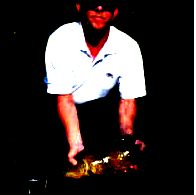

In [ ]:
numbers.rgb

_Maaaaybe?_ Looks like someone normalized him.

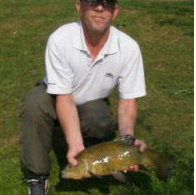

In [ ]:
in_stats = ( (0.485, 0.456, 0.406),     # mean 
             (0.229, 0.224, 0.225) )    # std

# numbers.rgb(in_stats, cl=True) # For channel-last input format
numbers.rgb(in_stats)

It's indeed our hero, the Tenchman!

## `.plt` the statistics

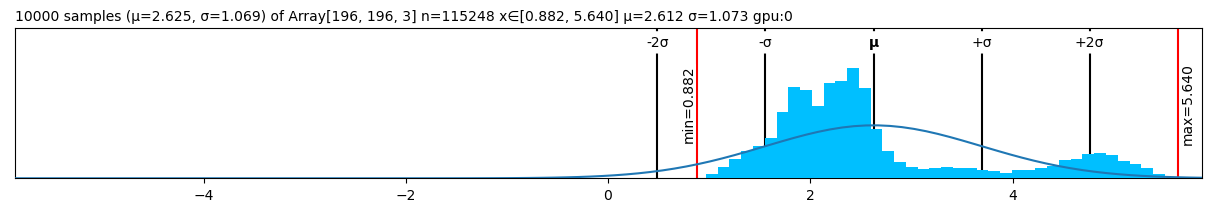

In [ ]:
(numbers+3).plt

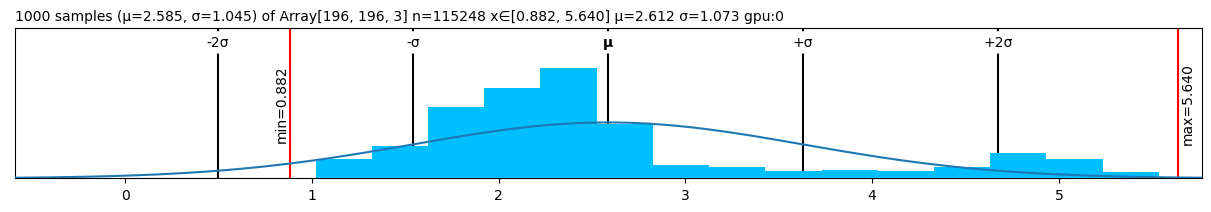

In [ ]:
(numbers+3).plt(center="mean", max_s=1000)

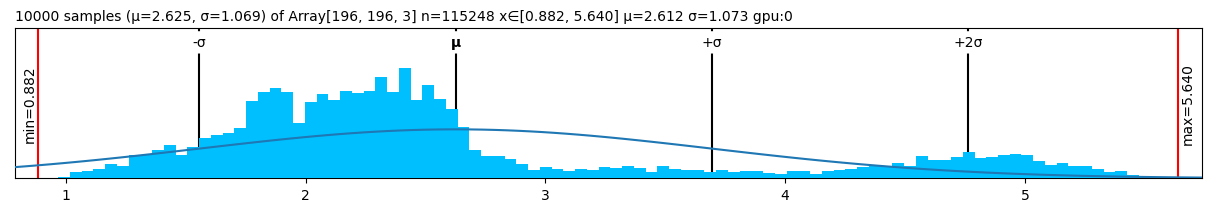

In [ ]:
(numbers+3).plt(center="range")

## See the `.chans`

In [ ]:
# .chans will map values betwen [-1,1] to colors.
# Make our values fit into that range to avoid clipping.
mean = jnp.array(in_stats[0])
std = jnp.array(in_stats[1])
numbers_01 = (numbers*std + mean)
numbers_01

Array[196, 196, 3] n=115248 x∈[0., 1.000] μ=0.361 σ=0.248 gpu:0

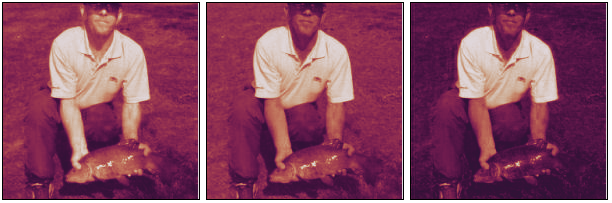

In [ ]:
numbers_01.chans

In [ ]:
# |hide
# Let's try with a Convolutional Neural Network

In [ ]:
# |hide
# # |eval:false
# from torchvision.models import vgg11

In [ ]:
# |hide
# # |eval:false
# features: torch.nn.Sequential = vgg11().features

# # I saved the first 5 layers in "features.pt"
# _ = features.load_state_dict(torch.load("../features.pt"), strict=False)

In [ ]:
# |hide
# # |eval:false
# # Activatons of the second max pool layer of VGG11
# acts = (features[:6](numbers[None])[0]/2) # /2 to reduce clipping
# acts

In [ ]:
# |hide
# # |eval:false
# acts[:4].chans(cmap="coolwarm", scale=4)

## Grouping

In [ ]:
# Make 8 images with progressively higher brightness and stack them 2x2x2.
eight_images = (jnp.stack([numbers]*8) + jnp.linspace(-2, 2, 8)[:,None,None,None])
eight_images = (eight_images
                     *jnp.array(in_stats[1])
                     +jnp.array(in_stats[0])
                ).clip(0,1).reshape(2,2,2,196,196,3)

eight_images

Array[2, 2, 2, 196, 196, 3] n=921984 x∈[0., 1.000] μ=0.382 σ=0.319 gpu:0

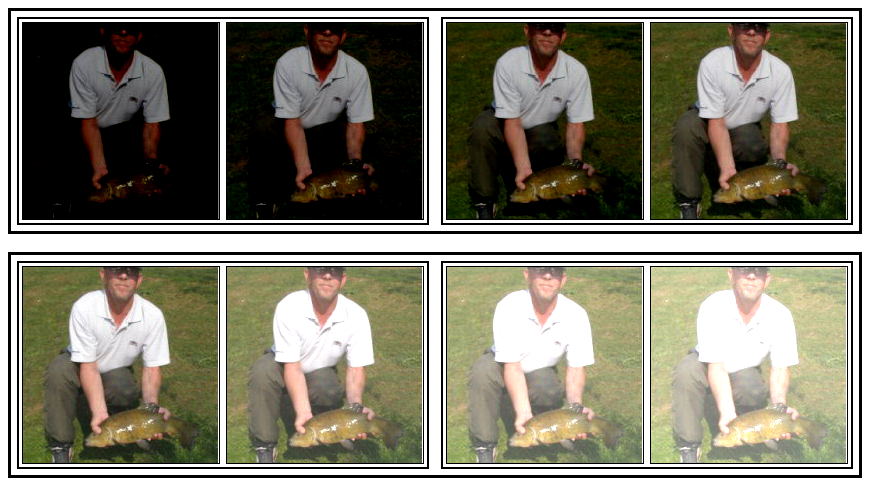

In [ ]:
eight_images.rgb

In [ ]:
# |hide
# # |eval:false
# # Weights of the second conv layer of VGG11
# features[3].weight

In [ ]:
# |hide
# I want +/- 2σ to fall in the range [-1..1]

In [ ]:
# |hide
# # |eval:false
# weights = features[3].weight.data
# weights = weights / (2*2*weights.std()) # *2 because we want 2σ on both sides, so 4σ
# # weights += weights.std() * 2
# weights.plt

In [ ]:
# |hide
# # |eval:false
# # Weights of the second conv layer (64ch -> 128ch) of VGG11,
# # grouped per output channel.
# weights.chans(frame_px=1, gutter_px=0)

In [ ]:
# |hide
# It's a bit hard to see. Scale up 10x, but onyl show the first 4 filters.

In [ ]:
# |hide
# # |eval:false
# weights[:4].chans(frame_px=1, gutter_px=0, scale=10)

## Options | [Docs](utils.config.html)

In [ ]:
from lovely_jax import set_config, config, lovely, get_config


In [ ]:
set_config(precision=5, sci_mode=True, color=False)
jnp.array([1., 2, jnp.nan])

Array[3] μ=1.50000e+00 σ=5.00000e-01 NaN! gpu:0 [1.00000e+00, 2.00000e+00, nan]

In [ ]:
set_config(precision=None, sci_mode=None, color=None) # None -> Reset to defaults

In [ ]:
print(jnp.array([1., 2]))
# Or with config context manager.
with config(sci_mode=True, precision=5):
    print(jnp.array([1., 2]))

print(jnp.array([1., 2]))

Array[2] μ=1.500 σ=0.500 gpu:0 [1.000, 2.000]
Array[2] μ=1.50000e+00 σ=5.00000e-01 gpu:0 [1.00000e+00, 2.00000e+00]
Array[2] μ=1.500 σ=0.500 gpu:0 [1.000, 2.000]


## Without `.monkey_patch`

In [ ]:
lj.lovely(spicy)

Array[2, 6] n=12 x∈[-3.541e+03, -1.975e-05] μ=-393.848 σ=1.113e+03 +Inf! -Inf! NaN! gpu:0

In [ ]:
lj.lovely(spicy, verbose=True)

Array[2, 6] n=12 x∈[-3.541e+03, -1.975e-05] μ=-393.848 σ=1.113e+03 +Inf! -Inf! NaN! gpu:0
Array([[-3.541e+03, -1.975e-05,        inf,       -inf,        nan, -9.853e-01],
       [-4.054e-01, -3.025e-01, -8.807e-01, -4.397e-01, -3.025e-01, -7.761e-01]], dtype=float32)

In [ ]:
lj.lovely(numbers, depth=1)

Array[196, 196, 3] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073 gpu:0
  Array[196, 3] n=588 x∈[-1.912, 2.411] μ=-0.728 σ=0.519 gpu:0
  Array[196, 3] n=588 x∈[-1.861, 2.359] μ=-0.778 σ=0.450 gpu:0
  Array[196, 3] n=588 x∈[-1.758, 2.379] μ=-0.838 σ=0.437 gpu:0
  Array[196, 3] n=588 x∈[-1.656, 2.466] μ=-0.878 σ=0.415 gpu:0
  Array[196, 3] n=588 x∈[-1.717, 2.448] μ=-0.882 σ=0.399 gpu:0
  Array[196, 3] n=588 x∈[-1.717, 2.431] μ=-0.905 σ=0.408 gpu:0
  Array[196, 3] n=588 x∈[-1.563, 2.448] μ=-0.859 σ=0.416 gpu:0
  Array[196, 3] n=588 x∈[-1.475, 2.431] μ=-0.791 σ=0.463 gpu:0
  Array[196, 3] n=588 x∈[-1.526, 2.429] μ=-0.759 σ=0.499 gpu:0
  ...

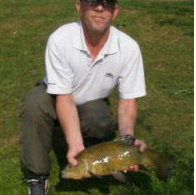

In [ ]:
lj.rgb(numbers, in_stats)

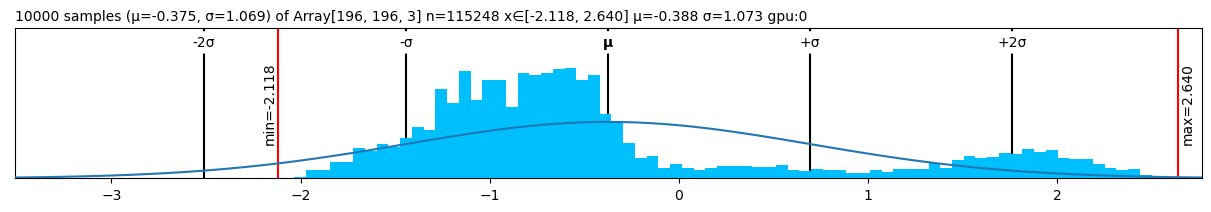

In [ ]:
lj.plot(numbers, center="mean")

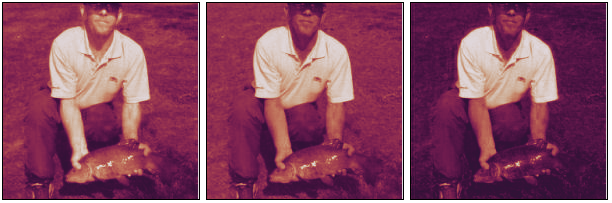

In [ ]:
lj.chans(numbers_01)

## Matplotlib integration | [Docs](matplotlib.html)

In [ ]:
# |hide

# Deterministic svg output
rcParams["svg.hashsalt"] = "1"

# No date, don't include matplotlib version
kwargs = {'metadata': {"Date": None, "Creator": "Matplotlib, https://matplotlib.org/" }} 
%config InlineBackend.print_figure_kwargs = kwargs

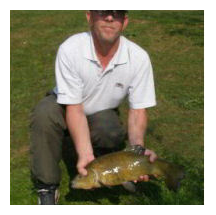

In [ ]:
numbers.rgb(in_stats).fig # matplotlib figure

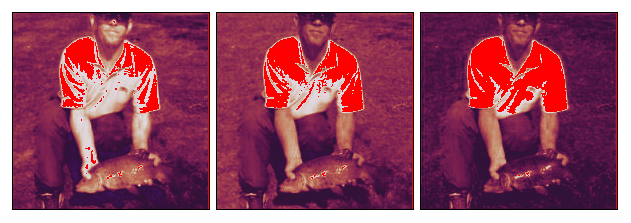

In [ ]:
(numbers*0.3+0.5).chans.fig # matplotlib figure

In [ ]:
numbers.plt.fig.savefig('pretty.svg') # Save it

In [ ]:
!file pretty.svg; rm pretty.svg

pretty.svg: SVG Scalable Vector Graphics image


### Add content to existing Axes

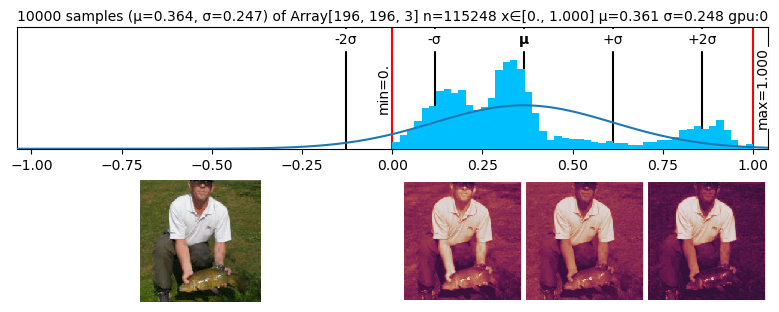

In [ ]:
fig = plt.figure(figsize=(8,3))
fig.set_constrained_layout(True)
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1,1:])

ax2.set_axis_off()
ax3.set_axis_off()

numbers_01.plt(ax=ax1)
numbers_01.rgb(ax=ax2)
numbers_01.chans(ax=ax3);